<div align = "center">

# **Comparacion de metodos**

</div>

## Librerias y funciones

- Librerias de python basicas

In [5]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from time import perf_counter
from itertools import product
from scipy import stats

- Carga de los metodos

In [6]:
from src.metodos import metodo_autovector, metodo_tiempos_retorno

- Carga de las generadoras de las matrices de prueba

In [7]:
from src.matrices import generar_caminata_aleatoria

## Caminata aleatoria simple

Iniciando análisis de caminata aleatoria simple
Procesando: n=10, p=0.2
Procesando: n=10, p=0.4
Procesando: n=10, p=0.6
Procesando: n=10, p=0.8
Procesando: n=60, p=0.2
Procesando: n=60, p=0.4
Procesando: n=60, p=0.6
Procesando: n=60, p=0.8
Procesando: n=110, p=0.2
Procesando: n=110, p=0.4
Procesando: n=110, p=0.6
Procesando: n=110, p=0.8
Procesando: n=160, p=0.2
Procesando: n=160, p=0.4
Procesando: n=160, p=0.6
Procesando: n=160, p=0.8
Procesando: n=210, p=0.2
Procesando: n=210, p=0.4
Procesando: n=210, p=0.6
Procesando: n=210, p=0.8
Procesando: n=260, p=0.2
Procesando: n=260, p=0.4
Procesando: n=260, p=0.6
Procesando: n=260, p=0.8
Procesando: n=310, p=0.2
Procesando: n=310, p=0.4
Procesando: n=310, p=0.6
Procesando: n=310, p=0.8
Procesando: n=360, p=0.2
Procesando: n=360, p=0.4
Procesando: n=360, p=0.6
Procesando: n=360, p=0.8
Procesando: n=410, p=0.2
Procesando: n=410, p=0.4
Procesando: n=410, p=0.6
Procesando: n=410, p=0.8
Procesando: n=460, p=0.2
Procesando: n=460, p=0.4
Procesando

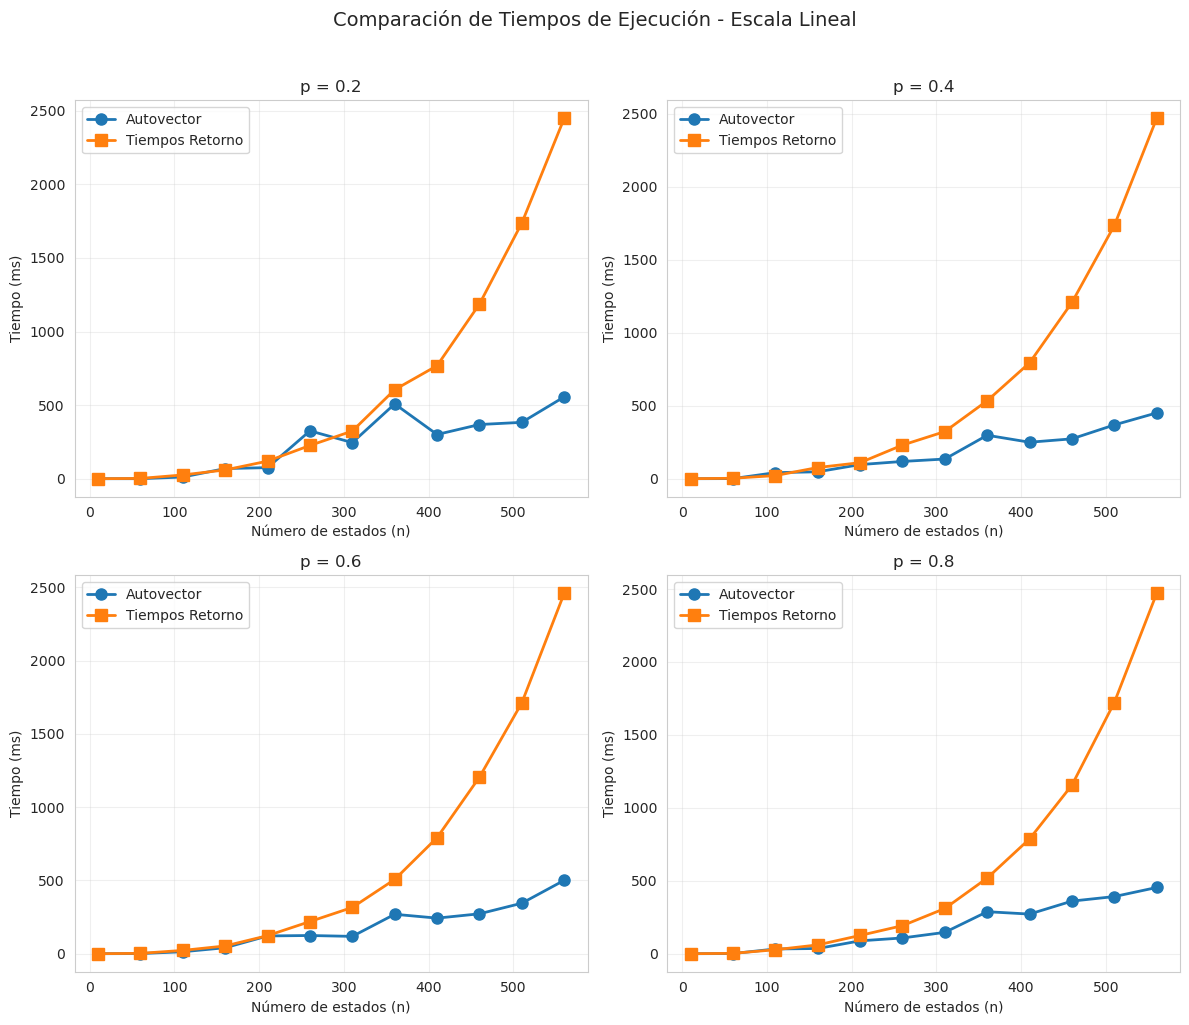

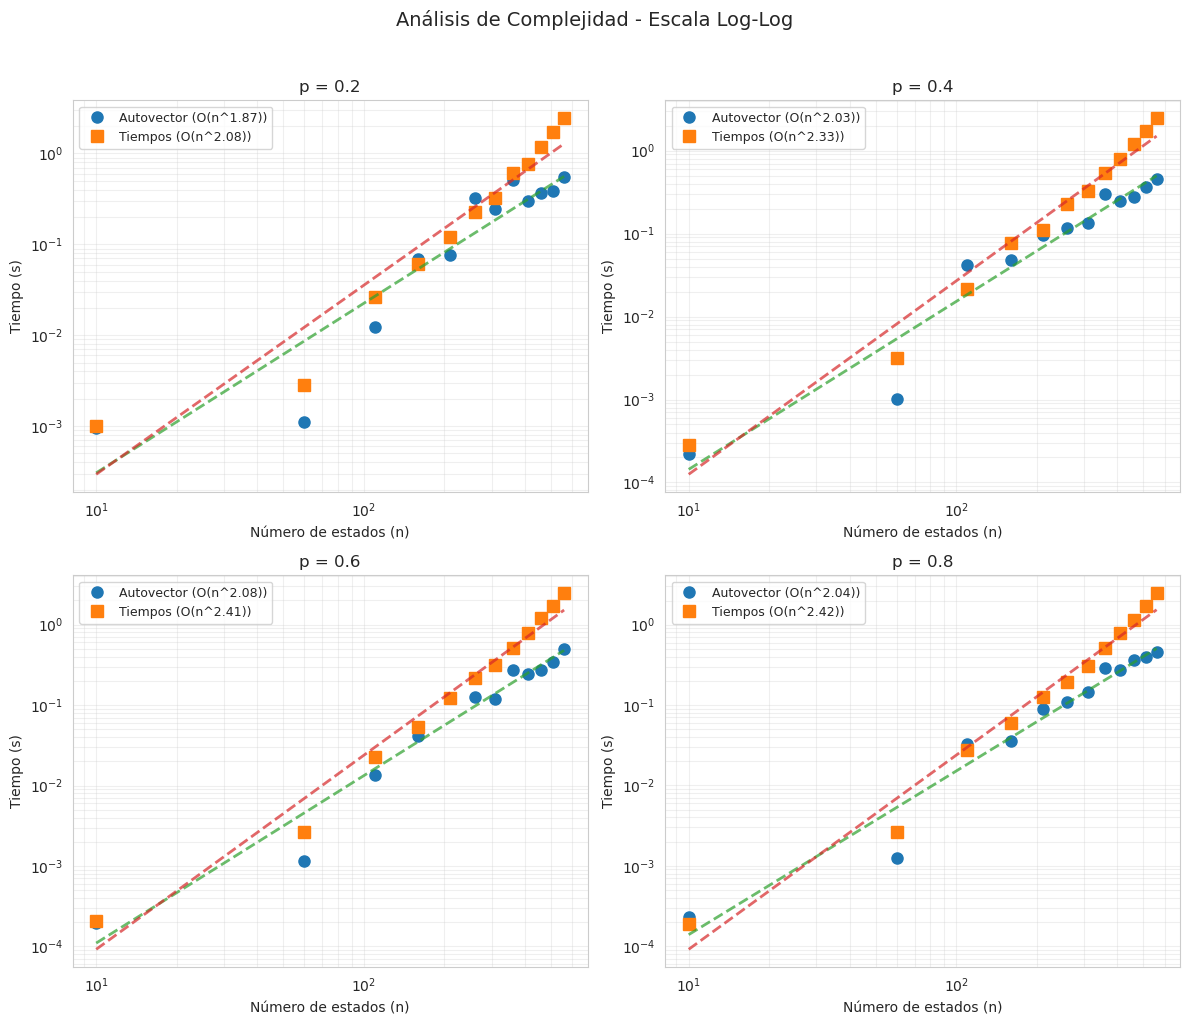


RESUMEN DE COMPLEJIDAD COMPUTACIONAL

p = 0.2:
  Autovector: O(n^1.87)
  Tiempos:    O(n^2.08)
  Ratio promedio: 2.17x

p = 0.4:
  Autovector: O(n^2.03)
  Tiempos:    O(n^2.33)
  Ratio promedio: 2.63x

p = 0.6:
  Autovector: O(n^2.08)
  Tiempos:    O(n^2.41)
  Ratio promedio: 2.60x

p = 0.8:
  Autovector: O(n^2.04)
  Tiempos:    O(n^2.42)
  Ratio promedio: 2.38x


In [8]:
# Configuración de visualización
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 10)

# Parámetros del experimento
n_valores = range(10, 610, 50)  # Estados: 10, 60, 110, 160
p_valores = [0.2, 0.4, 0.6, 0.8]  # 4 valores de p

# Contenedor de resultados
resultados = []

# Experimento principal
print("Iniciando análisis de caminata aleatoria simple")
print("=" * 50)

for n, p in product(n_valores, p_valores):
    print(f"Procesando: n={n}, p={p:.1f}")
    
    # Generar matriz de transición
    P = generar_caminata_aleatoria(n, p)
    
    # Medir tiempo método autovector
    start = perf_counter()
    pi_auto = metodo_autovector(P)
    t_auto = perf_counter() - start
    
    # Medir tiempo método tiempos de retorno
    start = perf_counter()
    pi_tiempo = metodo_tiempos_retorno(P)
    t_tiempo = perf_counter() - start
    
    # Verificar convergencia
    error_conv = np.linalg.norm(pi_auto - pi_tiempo)
    
    # Guardar resultados
    resultados.append({
        'n': n,
        'p': p,
        'tiempo_autovector': t_auto,
        'tiempo_retorno': t_tiempo,
        'ratio': t_tiempo / t_auto,
        'error_convergencia': error_conv
    })

# Crear DataFrame
df_caminata_aleatoria = pd.DataFrame(resultados)

print("\nResultados obtenidos:")
print(df_caminata_aleatoria.head())
print(f"\nTotal de experimentos: {len(df_caminata_aleatoria)}")

# Gráfica 1: n vs tiempo de ejecución (escala lineal)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, p in enumerate(p_valores):
    ax = axes[idx]
    df_p = df_caminata_aleatoria[df_caminata_aleatoria['p'] == p]
    
    ax.plot(df_p['n'], df_p['tiempo_autovector'] * 1000, 
            'o-', label='Autovector', linewidth=2, markersize=8)
    ax.plot(df_p['n'], df_p['tiempo_retorno'] * 1000, 
            's-', label='Tiempos Retorno', linewidth=2, markersize=8)
    
    ax.set_xlabel('Número de estados (n)')
    ax.set_ylabel('Tiempo (ms)')
    ax.set_title(f'p = {p}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('Comparación de Tiempos de Ejecución - Escala Lineal', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('../images/caminata_simple_lineal.png', dpi=150, bbox_inches='tight')
plt.show()

# Gráfica 2: log-log con regresión lineal
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Almacenar exponentes para el DataFrame
exponentes_auto = []
exponentes_tiempo = []

for idx, p in enumerate(p_valores):
    ax = axes[idx]
    df_p = df_caminata_aleatoria[df_caminata_aleatoria['p'] == p]
    
    # Escala log-log
    log_n = np.log(df_p['n'].values)
    log_t_auto = np.log(df_p['tiempo_autovector'].values)
    log_t_tiempo = np.log(df_p['tiempo_retorno'].values)
    
    # Regresión lineal
    slope_auto, intercept_auto, r_auto, _, _ = stats.linregress(log_n, log_t_auto)
    slope_tiempo, intercept_tiempo, r_tiempo, _, _ = stats.linregress(log_n, log_t_tiempo)
    
    # Guardar exponentes
    exponentes_auto.append(slope_auto)
    exponentes_tiempo.append(slope_tiempo)
    
    # Graficar datos y regresión
    ax.loglog(df_p['n'], df_p['tiempo_autovector'], 
              'o', label=f'Autovector (O(n^{slope_auto:.2f}))', markersize=8)
    ax.loglog(df_p['n'], df_p['tiempo_retorno'], 
              's', label=f'Tiempos (O(n^{slope_tiempo:.2f}))', markersize=8)
    
    # Líneas de regresión
    n_fit = np.array(df_p['n'])
    ax.loglog(n_fit, np.exp(intercept_auto) * n_fit**slope_auto, 
              '--', alpha=0.7, linewidth=2)
    ax.loglog(n_fit, np.exp(intercept_tiempo) * n_fit**slope_tiempo, 
              '--', alpha=0.7, linewidth=2)
    
    ax.set_xlabel('Número de estados (n)')
    ax.set_ylabel('Tiempo (s)')
    ax.set_title(f'p = {p}')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3, which="both")

plt.suptitle('Análisis de Complejidad - Escala Log-Log', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('../images/caminata_simple_loglog.png', dpi=150, bbox_inches='tight')
plt.show()

# Agregar exponentes al DataFrame
for i, p in enumerate(p_valores):
    mask = df_caminata_aleatoria['p'] == p
    df_caminata_aleatoria.loc[mask, 'exponente_autovector'] = exponentes_auto[i]
    df_caminata_aleatoria.loc[mask, 'exponente_tiempo'] = exponentes_tiempo[i]

# Resumen estadístico
print("\n" + "=" * 50)
print("RESUMEN DE COMPLEJIDAD COMPUTACIONAL")
print("=" * 50)
for p in p_valores:
    df_p = df_caminata_aleatoria[df_caminata_aleatoria['p'] == p]
    exp_auto = df_p['exponente_autovector'].iloc[0]
    exp_tiempo = df_p['exponente_tiempo'].iloc[0]
    ratio_medio = df_p['ratio'].mean()
    print(f"\np = {p}:")
    print(f"  Autovector: O(n^{exp_auto:.2f})")
    print(f"  Tiempos:    O(n^{exp_tiempo:.2f})")
    print(f"  Ratio promedio: {ratio_medio:.2f}x")

## Caminata aleatoria doble

## Caminata aleatoria con perturbacion